### Introdução - aproximação de Stirling: ###
A distribuição de Poisson é dada por:

$ Poisson(k | \lambda) = \frac{e^{-\lambda}\lambda^{k}}{k!}$, k $\epsilon$ {0, 1, 2, ...}

Para um $\lambda$ grande, a distribuição, nas redondezas de $k\approx\lambda$, pode ser aproximada por uma Normal com $\mu=\lambda$ e $\sigma=\lambda$:

$\frac{e^{-\lambda}\lambda^{k}}{k!}\approx\frac{1}{\sqrt{2\pi\lambda}}e^{\frac{-(k-\lambda)^2}{2\lambda}}$

Utilizando $k=\lambda$:

$\frac{e^{-\lambda}\lambda^{\lambda}}{\lambda!}\approx\frac{1}{\sqrt{2\pi\lambda}}$

$\lambda! \approx e^{-\lambda}\lambda^{\lambda}\sqrt{2\pi\lambda}$ **(Aproximação de Stirling)**

Utilizando o log da aproximação:

$\log\lambda! \approx {-\lambda}+ \lambda\log\lambda + \frac{1}{2}\log{2\pi\lambda}$

Essa aproximação possui a "aproximação principal" e a aproximação de baixo peso $\frac{1}{2}\log{2\pi\lambda}$. Para simplificar o cálculo, vamos cortar a aproximação de baixo peso.

A partir dessa aproximação, é possível aproximar o termo $\log\binom{N}{k}$:

$\log\binom{N}{k} \equiv \log\frac{N!}{k!(N-k)!} \equiv \log{N!} - \log{(N-k)!} - \log{k!}$

$\approx N \log{N} - N - (N-k)\log{(N-k)} + (N-k) - k \log{k} + k $

Somando e subtraindo $k\log{N}$

$\approx (N-k)\log{\frac{N}{N-k}} + k\log{\frac{N}{k}} $

Multiplicando e dividindo por N:

$\approx N \left [ \frac{N-k}{N}\log{\frac{N}{N-k}} + \frac{k}{N}\log{\frac{N}{k}} \right ]$

Utilizando $x=\frac{k}{N}$:

$\approx N \left [ (1-x)\log{\frac{1}{1-x}} + x\log{\frac{1}{x}} \right ]$

Se definirmos a **entropia binária** como:

$H_2(x) = x\log{\frac{1}{x}} + (1-x)\log{\frac{1}{1-x}}$

Podemos reescrever a aproximação do termo $\log\binom{N}{k}$ como:

$\log\binom{N}{k} \approx NH_2(\frac{k}{N})$

Como todos os termos são logaritmicos, é possível reescrever aplicando o log em base 2:

$\binom{N}{k} \approx 2^{NH_2(\frac{k}{N})}$

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

O ponto máximo foi encontrado em: 0.50


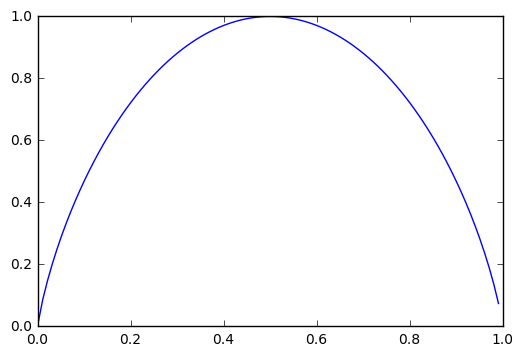

In [18]:
x = np.arange(0.001, 1, 0.01)
h = x * np.log2(1/x) + (1-x) * np.log2(1/(1-x))
plt.plot(x,h)
idx_max = np.argmax(h)
print("O ponto máximo foi encontrado em: %.2f" % x[idx_max])

### Noisy Communication Channel ###

Probabilidade de erro de 1 bit: $f$

/home/lmoraes/miniconda3/envs/notebook3/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/lmoraes/miniconda3/envs/notebook3/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


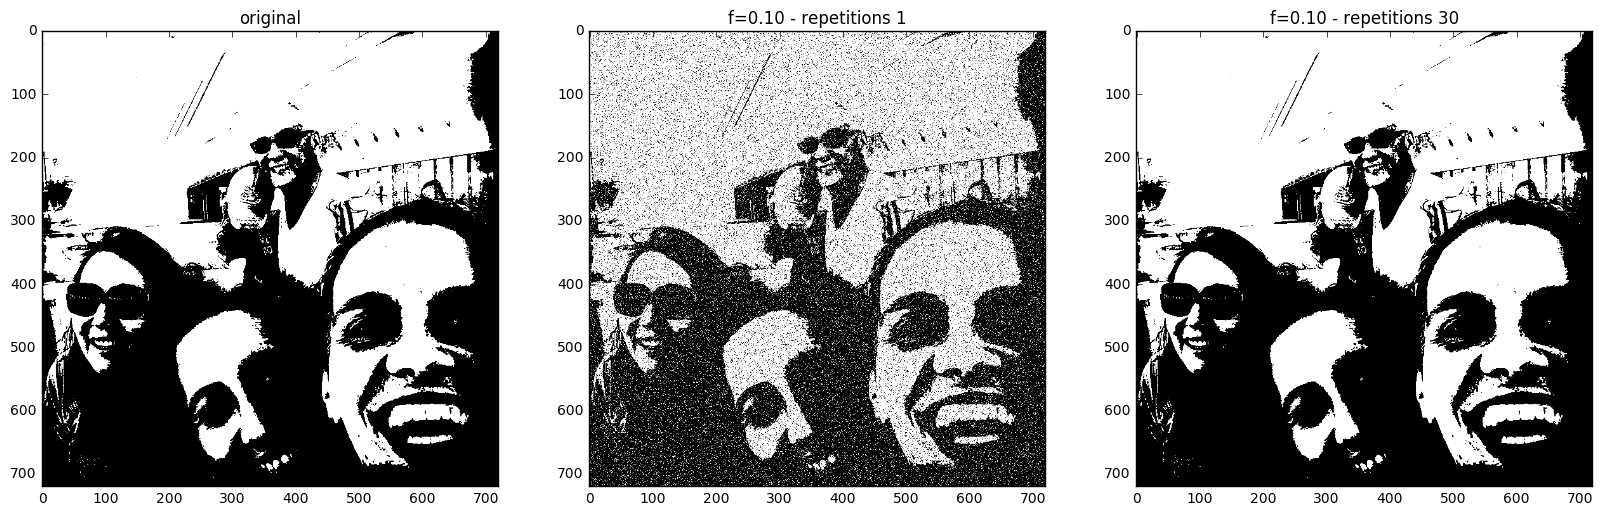

In [288]:
# Carrega imagem em preto e branco
jpgfile = Image.open("picture.jpg").convert('L')
data = jpgfile.point(lambda x: 0 if x<128 else 255, '1')

def encode(data, repetition):
    data_transmited = np.asarray(data, np.uint8) 
    transmission_shape = (data_transmited.shape[0], data_transmited.shape[1]*repetition)
    data_transmited = np.repeat(data_transmited, repetition)
    data_transmited = data_transmited.reshape(transmission_shape[0], transmission_shape[1])
    
    return data_transmited

def decode(data, repetition):
    received_shape = (data.shape[0], data.shape[1]/repetition)
    data_received = np.asarray(data, np.uint8)
    data_received = data_received.reshape(received_shape[0]*received_shape[1], repetition)
    data_received = np.argmax(np.apply_along_axis(np.bincount, 1, data_received, minlength=2), axis=1)
    data_received = data_received.reshape(received_shape)
    data_received = np.asarray(data_received, np.uint8)
    
    return data_received

def send(data, f=0.1, repetition=1):
    
    # Encode transmitted data
    data_transmited = encode(data, repetition)
    
    # Add noise when going through channel
    noise = np.random.choice([0, 1], size=data_transmited.shape, p=[1-f, f])
    data_received = data_transmited ^ noise
    
    # Decode received data
    data_received = decode(data_received, repetition)

    # Convert to image format
    i = Image.fromarray(data_received)
    data_recovered = i.point(lambda x: 0 if not x else 255, '1')
    
    return data_recovered

# Coloca ruído com probabilidade f = 0.1
f = 0.1
n = 30
data1 = send(data, f, 1)
data3 = send(data, f, n)

_, (ax, bx, cx) = plt.subplots(1, 3, figsize=(20,20))
ax.imshow(data)
ax.set_title("original")
bx.imshow(data1)
bx.set_title("f=%.2f - repetitions %d" %(f,1))
cx.imshow(data3)
cx.set_title("f=%.2f - repetitions %d" %(f,n))
plt.show()

/home/lmoraes/miniconda3/envs/notebook3/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/lmoraes/miniconda3/envs/notebook3/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


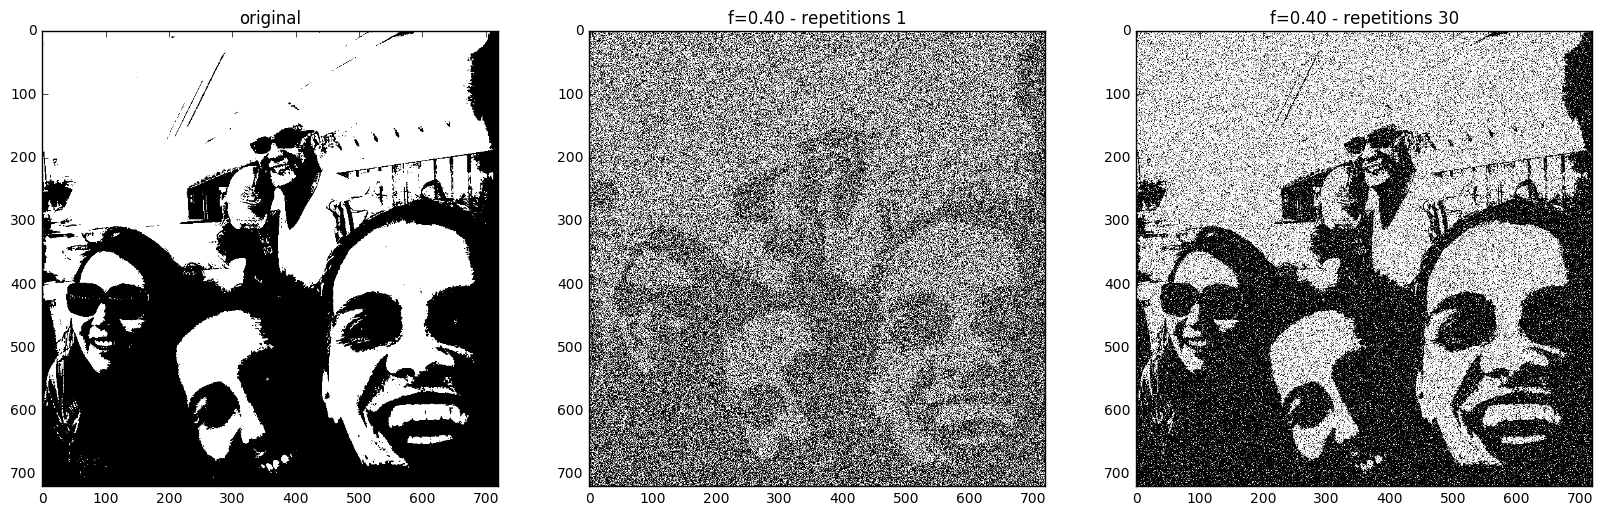

In [289]:
# Coloca ruído com probabilidade f = 0.4
f = 0.4
n = 30
data1 = send(data, f, 1)
data3 = send(data, f, n)

_, (ax, bx, cx) = plt.subplots(1, 3, figsize=(20,20))
ax.imshow(data)
ax.set_title("original")
bx.imshow(data1)
bx.set_title("f=%.2f - repetitions %d" %(f,1))
cx.imshow(data3)
cx.set_title("f=%.2f - repetitions %d" %(f,n))
plt.show()